In [220]:
#clear all varaibles
%reset

In [157]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

In [105]:
d0_en = []
d0_ang = []

# opening the CSV file  
with open('d_0.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d0_en.append(float(lines[0]))
        d0_ang.append(float(lines[1]))

d2_en = []
d2_ang = []

# opening the CSV file  
with open('d_2.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d2_en.append(float(lines[0]))
        d2_ang.append(float(lines[1]))

d4_en = []
d4_ang = []

# opening the CSV file  
with open('d_4.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d4_en.append(float(lines[0]))
        d4_ang.append(float(lines[1]))

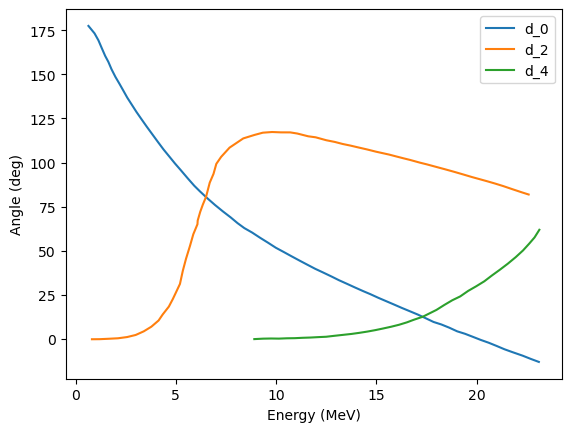

In [106]:
plt.Figure
plt.plot(d0_en, d0_ang, label="d_0")
plt.plot(d2_en, d2_ang, label="d_2")
plt.plot(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')

In [174]:
# Convert everything to a numpy array
d0_ang = np.array(d0_ang)
d0_en = np.array(d0_en)
d2_ang = np.array(d2_ang)
d2_en = np.array(d2_en)
d4_ang = np.array(d4_ang)
d4_en = np.array(d4_en)

# Get rid of negative values in d2 and d4
# Now add zeros
number_zeros = 10

pos_d2 = d2_ang > 0
if ~np.all(pos_d2):
    d2_ang = d2_ang[pos_d2]
    d2_en = d2_en[pos_d2]
    if d2_en[0] != 0:
        d2_ang = np.concatenate((np.zeros(number_zeros), d2_ang))
        d2_en = np.concatenate((np.linspace(0, d2_en[0], number_zeros), d2_en))

pos_d4 = d4_ang > 0
if ~np.all(pos_d4):
    d4_ang = d4_ang[pos_d4]
    d4_en = d4_en[pos_d4]
    if d4_en[0] != 0:
        d4_ang = np.concatenate((np.zeros(number_zeros), d4_ang))
        d4_en = np.concatenate((np.linspace(0, d4_en[0], number_zeros), d4_en))

# Now get rid of any repeating energies. All should be unique.
# Remove duplicate energy values (x) while keeping matching delta_L (y)
d0_en, indices = np.unique(d0_en, return_index=True)
d0_ang = d0_ang[indices]

d2_en, indices = np.unique(d2_en, return_index=True)
d2_ang = d2_ang[indices]

d4_en, indices = np.unique(d4_en, return_index=True)
d4_ang = d4_ang[indices]

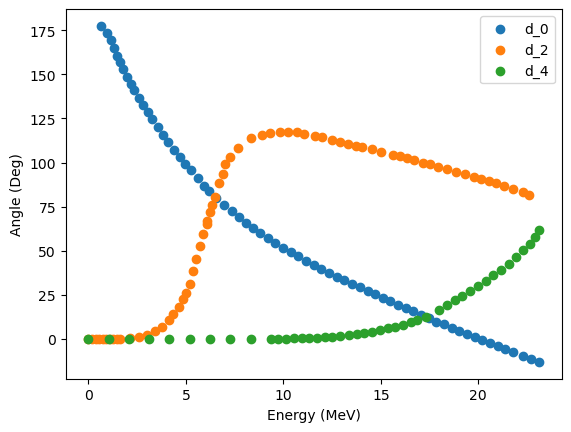

In [175]:
# Plot

plt.Figure
plt.scatter(d0_en, d0_ang, label="d_0")
plt.scatter(d2_en, d2_ang, label="d_2")
plt.scatter(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (Deg)")
plt.legend(loc='upper right')

In [209]:
common_energy = np.linspace(0.1, 23, 75)

interp_l0 = interp1d(d0_en, d0_ang, kind='cubic', fill_value="extrapolate")
interp_l2 = interp1d(d2_en, d2_ang, kind='cubic', fill_value="extrapolate")
interp_l4 = interp1d(d4_en, d4_ang, kind='cubic', fill_value="extrapolate")

d_l0_interp = interp_l0(common_energy)
d_l2_interp = interp_l2(common_energy)
d_l4_interp = interp_l4(common_energy)

# Create the spline fit (s=0 means interpolate exactly)
#delta_spline_0 = UnivariateSpline(d0_en, d0_ang, s=2)
#delta_spline_2 = UnivariateSpline(d2_en, d2_ang, s=2)
#delta_spline_4 = UnivariateSpline(d4_en, d4_ang, s=2)

#delta_vals_0 = delta_spline_0(common_energy)
#delta_vals_2 = delta_spline_2(common_energy)
#delta_vals_4 = delta_spline_4(common_energy)

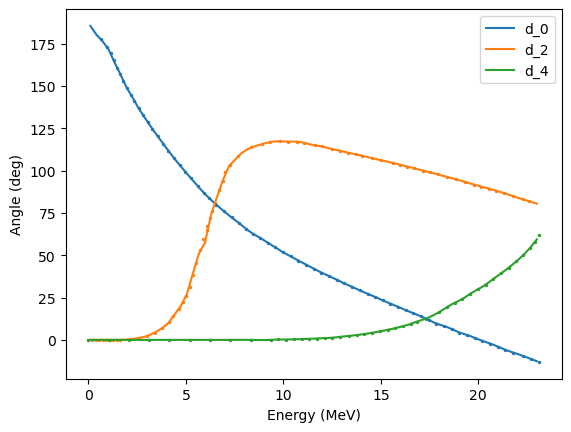

In [210]:
plt.Figure()
#plt.plot(common_energy, delta_vals_0, label="d_0")
#plt.plot(common_energy, delta_vals_2, label="d_2")
#plt.plot(common_energy, delta_vals_4, label="d_4")
plt.plot(common_energy, d_l0_interp, label="d_0")
plt.plot(common_energy, d_l2_interp, label="d_2")
plt.plot(common_energy, d_l4_interp, label="d_4")
plt.scatter(d0_en, d0_ang, s=2)
plt.scatter(d2_en, d2_ang, s=2)
plt.scatter(d4_en, d4_ang, s=2)
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')
#plt.xlim(0, 5)
#plt.ylim(-1, 5)

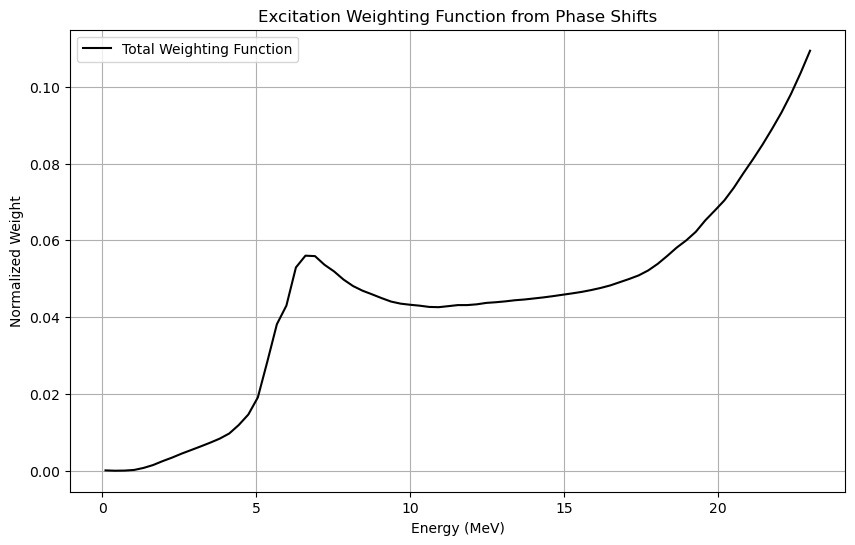

In [211]:
# Compute derivatives

W0 = (2*0 + 1) * np.sin(np.radians(d_l0_interp))**2
W2 = (2*2 + 1) * np.sin(np.radians(d_l2_interp))**2
W4 = (2*4 + 1) * np.sin(np.radians(d_l4_interp))**2

W_total = W0 + W2 + W4

W_total /= np.trapz(W_total, common_energy)  # Normalize area under curve to 1


plt.figure(figsize=(10,6))
plt.plot(common_energy, W_total, label='Total Weighting Function', color='black')
#plt.plot(common_energy, W0, label=r'$L=0$', linestyle='--')
#plt.plot(common_energy, W2, label=r'$L=2$', linestyle='-.')
#plt.plot(common_energy, W4, label=r'$L=4$', linestyle=':')
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalized Weight')
plt.title('Excitation Weighting Function from Phase Shifts')
plt.legend()
plt.grid(True)
#plt.yscale('log')
plt.show()

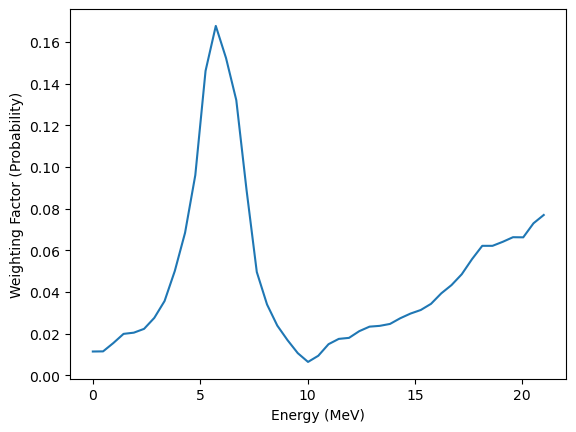

In [12]:
plt.plot(common_energy, P_E)
plt.xlabel("Energy (MeV)")
plt.ylabel("Weighting Factor (Probability)")
#plt.legend()
plt.show()

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set mpmath precision (digits)
mpmath.mp.dps = 15  # Default precision is good enough

# Constants
hbar_c = 197.327  # MeV*fm
e_squared = 1.4399764  # MeV*fm Note: e^2 \equiv \frac{e^2}{4 \pi \epsilon_0}
Z1 = 2  # Alpha particle charge
Z2 = 2
mu = 1863.7  # Reduced mass (MeV/c^2)

# Energy range
energies = np.linspace(0.1, 23.0, 100)  # Avoid exactly zero to prevent division by zero

k = np.sqrt(2 * mu * energies) / hbar_c  # in 1/fm
eta = Z1 * Z2 * e_squared * mu / (hbar_c**2 * k)
r0 = 3.5 # fm, fixed nuclear radius where we evaluate
kr = k * r0

F_0 = []
G_0 = []
F_0_prime = []
G_0_prime = []
F_2 = []
G_2 = []
F_2_prime = []
G_2_prime = []
F_4 = []
G_4 = []
F_4_prime = []
G_4_prime = []

for kr_i, eta_i in zip(kr, eta):

    L=0
    F_0.append(float(mpmath.coulombf(L, eta_i, kr_i, derivative=False)))
    F_0_prime.append(float(mpmath.coulombf(L, eta_i, kr_i, derivative=True)))
    G_0.append(float(mpmath.coulombg(L, eta_i, kr_i, derivative=False)))
    G_0_prime.append(float(mpmath.coulombg(L, eta_i, kr_i, derivative=True)))

    L=2
    F_2.append(float(mpmath.coulombf(L, eta_i, kr_i, derivative=False)))
    F_2_prime.append(float(mpmath.coulombf(L, eta_i, kr_i, derivative=True)))
    G_2.append(float(mpmath.coulombg(L, eta_i, kr_i, derivative=False)))
    G_2_prime.append(float(mpmath.coulombg(L, eta_i, kr_i, derivative=True)))

    L=4
    F_4.append(float(mpmath.coulombf(L, eta_i, kr_i, derivative=False)))
    F_4_prime.append(float(mpmath.coulombf(L, eta_i, kr_i, derivative=True)))
    G_4.append(float(mpmath.coulombg(L, eta_i, kr_i, derivative=False)))
    G_4_prime.append(float(mpmath.coulombg(L, eta_i, kr_i, derivative=True)))

F_0 = np.array(F_0)
G_0 = np.array(G_0)
F_0_prime = np.array(F_0_prime)
G_0_prime = np.array(G_0_prime)

F_2 = np.array(F_2)
G_2 = np.array(G_2)
F_2_prime = np.array(F_2_prime)
G_2_prime = np.array(G_2_prime)

F_4 = np.array(F_4)
G_4 = np.array(G_4)
F_4_prime = np.array(F_4_prime)
G_4_prime = np.array(G_4_prime)

In [223]:
E_r = 3.18
gamma_sqr = 3.36

hardSphere_2 = np.degrees(np.arctan2(F_2,G_2))
penetrationFactor_2 = kr/(F_2**2 + G_2**2)
levelWidth_2 = 2*penetrationFactor_2*gamma_sqr
shiftFactor_2 = penetrationFactor_2*(F_2*F_2_prime + G_2*G_2_prime)

delta_2 = -hardSphere_2 + np.degrees(np.arctan(1/2*levelWidth_2/(E_r - energies)))

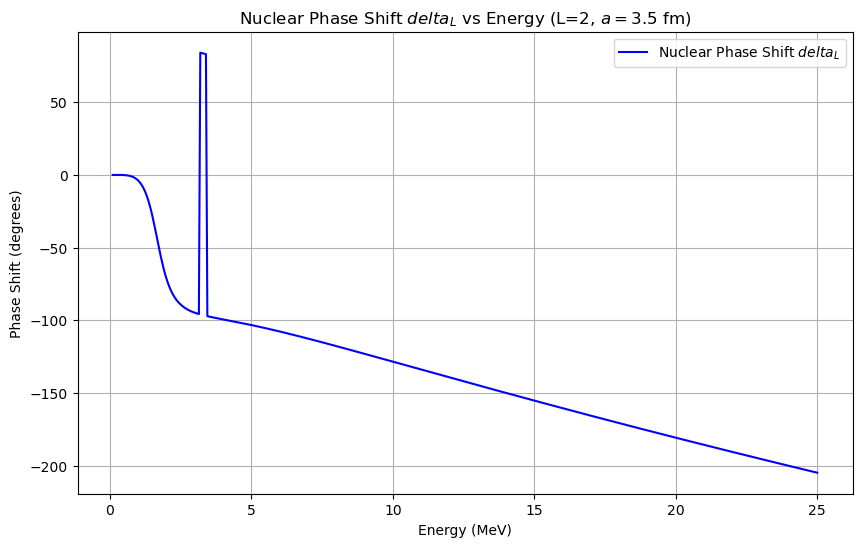

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set precision
mpmath.mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm
Z1 = 2
Z2 = 2
mu = 1863.7  # MeV/c^2
a = 3.5  # fm, channel radius
L = 2  # d-wave

# Resonance parameters
E_r = 3.18  # MeV, resonance energy
gamma2 = 3.36  # MeV, reduced width

# Energy range
energies = np.linspace(0.1, 25.0, 500)

# Arrays to store results
delta_L = []
phi_L = []
S_L_list = []
P_L_list = []

# First, compute S_L at the resonance energy
k_r = np.sqrt(2 * mu * E_r) / hbar_c
eta_r = Z1 * Z2 * e_squared * mu / (hbar_c**2 * k_r)
kr_r = k_r * a

F_L_r = float(mpmath.coulombf(L, eta_r, kr_r, derivative=False))
G_L_r = float(mpmath.coulombg(L, eta_r, kr_r, derivative=False))
F_Lp_r = float(mpmath.coulombf(L, eta_r, kr_r, derivative=True))
G_Lp_r = float(mpmath.coulombg(L, eta_r, kr_r, derivative=True))

P_L_r = (k_r * a) / (F_L_r**2 + G_L_r**2)
S_L_r = P_L_r * (F_L_r * F_Lp_r + G_L_r * G_Lp_r)  # Shift factor at E_r

# Loop over energies
for E in energies:
    k = np.sqrt(2 * mu * E) / hbar_c  # fm^-1
    eta = Z1 * Z2 * e_squared * mu / (hbar_c**2 * k)
    kr = k * a

    # Coulomb wavefunctions and derivatives
    F_L = float(mpmath.coulombf(L, eta, kr, derivative=False))
    G_L = float(mpmath.coulombg(L, eta, kr, derivative=False))
    F_Lp = float(mpmath.coulombf(L, eta, kr, derivative=True))
    G_Lp = float(mpmath.coulombg(L, eta, kr, derivative=True))
    
    # Hard-sphere phase shift Phi_L
    phi = np.arctan2(F_L , G_L)  # radians
    phi_L.append(phi)

    # Penetrability P_L
    P_L = (k * a) / (F_L**2 + G_L**2)
    P_L_list.append(P_L)

    # Shift factor S_L
    S_L = P_L * (F_L * F_Lp + G_L * G_Lp)
    S_L_list.append(S_L)

    # Energy-dependent width Gamma(E)
    Gamma_E = 2 * P_L * gamma2

    # Shift correction Delta(E)
    Delta_E = gamma2 * (S_L - S_L_r)

    # Phase shift delta_L
    argument = (0.5 * Gamma_E) / (E_r + Delta_E - E)
    delta = -phi + np.arctan(argument)
    delta_L.append(delta)

# Convert lists to arrays
delta_L = np.array(delta_L)
phi_L = np.array(phi_L)
S_L_list = np.array(S_L_list)
P_L_list = np.array(P_L_list)

# Convert to degrees for plotting
delta_L_deg = np.degrees(delta_L)

# Plot the nuclear phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, delta_L_deg, color='blue', label=r'Nuclear Phase Shift $delta_L$')
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Nuclear Phase Shift $delta_L$ vs Energy (L=2, $a=3.5$ fm)')
plt.grid(True)
plt.legend()
plt.show()

<>:64: SyntaxWarning: invalid escape sequence '\G'
<>:65: SyntaxWarning: invalid escape sequence '\G'
<>:64: SyntaxWarning: invalid escape sequence '\G'
<>:65: SyntaxWarning: invalid escape sequence '\G'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_34187/345219778.py:64: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel('Width $\Gamma(E)$ (MeV)')
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_34187/345219778.py:65: SyntaxWarning: invalid escape sequence '\G'
  plt.title('Energy-dependent Width $\Gamma(E)$ vs Energy')


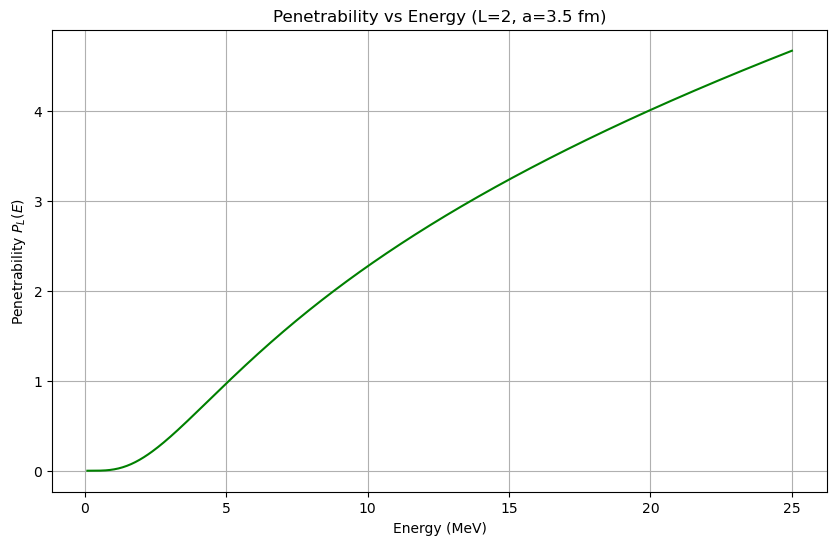

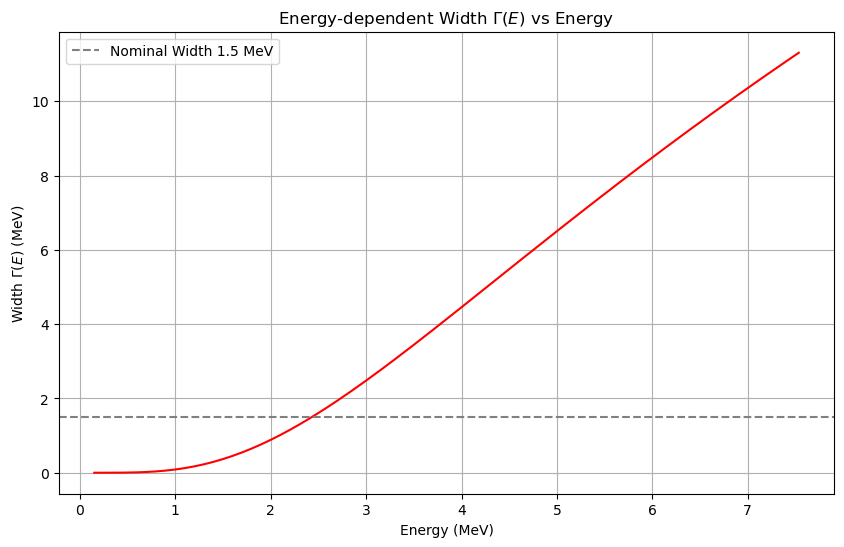

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set precision
mpmath.mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm
Z1 = 2
Z2 = 2
mu = 1863.7  # MeV/c^2
a = 3.5  # fm, channel radius
L = 2  # d-wave

# Resonance parameters
E_r = 3.18  # MeV, resonance energy
gamma2 = 3.36  # MeV, reduced width

# Energy range
energies = np.linspace(0.1, 25.0, 500)

# Arrays to store
P_L_list = []
Gamma_E_list = []

# Loop over energies
for E in energies:
    k = np.sqrt(2 * mu * E) / hbar_c  # fm^-1
    eta = Z1 * Z2 * e_squared * mu / (hbar_c**2 * k)
    kr = k * a

    # Coulomb wavefunctions at r = a
    F_L = float(mpmath.coulombf(L, eta, kr, derivative=False))
    G_L = float(mpmath.coulombg(L, eta, kr, derivative=False))
    
    # Penetrability
    P_L = (k * a) / (F_L**2 + G_L**2)
    P_L_list.append(P_L)
    
    # Energy-dependent width
    Gamma_E = 2 * P_L * gamma2
    Gamma_E_list.append(Gamma_E)

# Convert lists to arrays
P_L_array = np.array(P_L_list)
Gamma_E_array = np.array(Gamma_E_list)

# Plot Penetrability P_L(E)
plt.figure(figsize=(10, 6))
plt.plot(energies, P_L_array, color='green')
plt.xlabel('Energy (MeV)')
plt.ylabel('Penetrability $P_L(E)$')
plt.title('Penetrability vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.show()

# Plot Gamma(E)
plt.figure(figsize=(10, 6))
plt.plot(energies[1:150], Gamma_E_array[1:150], color='red')
plt.axhline(y=1.5, color='gray', linestyle='--', label='Nominal Width 1.5 MeV')
plt.xlabel('Energy (MeV)')
plt.ylabel('Width $\Gamma(E)$ (MeV)')
plt.title('Energy-dependent Width $\Gamma(E)$ vs Energy')
plt.legend()
plt.grid(True)
plt.show()

<>:91: SyntaxWarning: invalid escape sequence '\d'
<>:91: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2142/1088759235.py:91: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')


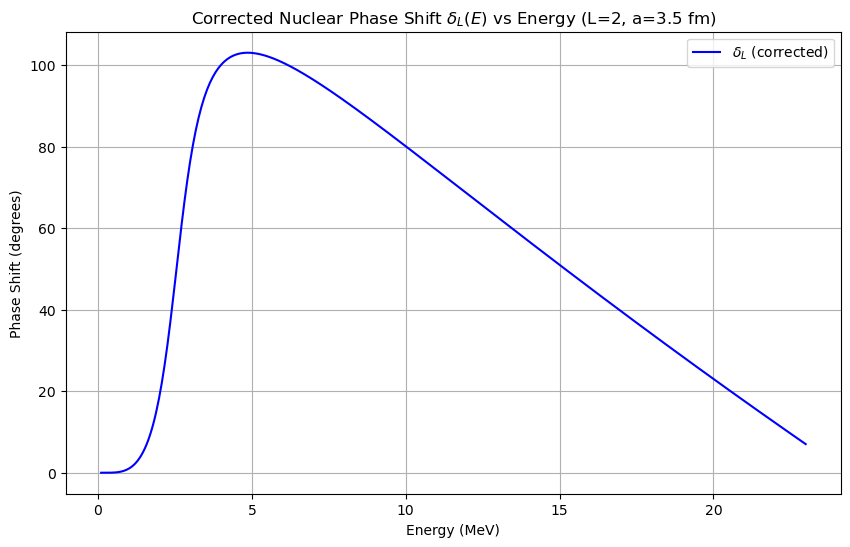

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set mpmath precision
mpmath.mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm
Z1 = 2
Z2 = 2
mu = 1863.7  # MeV/c^2
a = 3.5  # fm (channel radius)
L = 2  # d-wave

# Resonance parameters
E_r = 3.18  # MeV (resonance energy)
gamma2 = 3.36  # MeV (reduced width)

# Energy range
energies = np.linspace(0.1, 23.0, 500)

# Arrays to store
delta_L = []
phi_L = []
P_L_list = []
S_L_list = []

# Precompute shift factor S_L(E_r)
k_r = np.sqrt(2 * mu * E_r) / hbar_c
eta_r = Z1 * Z2 * e_squared * mu / (hbar_c**2 * k_r)
kr_r = k_r * a

F_L_r = float(mpmath.coulombf(L, eta_r, kr_r, derivative=False))
G_L_r = float(mpmath.coulombg(L, eta_r, kr_r, derivative=False))
F_Lp_r = float(mpmath.coulombf(L, eta_r, kr_r, derivative=True))
G_Lp_r = float(mpmath.coulombg(L, eta_r, kr_r, derivative=True))

P_L_r = (k_r * a) / (F_L_r**2 + G_L_r**2)
S_L_r = P_L_r * (F_L_r * F_Lp_r + G_L_r * G_Lp_r)

# Loop over energies
for E in energies:
    k = np.sqrt(2 * mu * E) / hbar_c
    eta = Z1 * Z2 * e_squared * mu / (hbar_c**2 * k)
    kr = k * a

    # Coulomb wavefunctions
    F_L = float(mpmath.coulombf(L, eta, kr, derivative=False))
    G_L = float(mpmath.coulombg(L, eta, kr, derivative=False))
    F_Lp = float(mpmath.coulombf(L, eta, kr, derivative=True))
    G_Lp = float(mpmath.coulombg(L, eta, kr, derivative=True))

    # Hard-sphere Coulomb phase shift Phi_L
    phi = np.arctan2(F_L, G_L)
    phi_L.append(phi)

    # Penetrability
    P_L = (k * a) / (F_L**2 + G_L**2)
    P_L_list.append(P_L)

    # Shift factor
    S_L = P_L * (F_L * F_Lp + G_L * G_Lp)
    S_L_list.append(S_L)

    # Width and shift correction
    Gamma_E = 2 * P_L * gamma2
    Delta_E = gamma2 * (S_L - S_L_r)

    # Correct phase shift calculation with arctan2
    numerator = 0.5 * Gamma_E
    denominator = E_r + Delta_E*0 - E
    delta = -phi + np.arctan2(numerator, denominator)
    delta_L.append(delta)

# Convert to arrays
delta_L = np.array(delta_L)
phi_L = np.array(phi_L)
P_L_array = np.array(P_L_list)
S_L_array = np.array(S_L_list)

# Convert phase shift to degrees
delta_L_deg = np.degrees(delta_L)

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, delta_L_deg, label=r'$\delta_L$ (corrected)', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()


In [97]:
np.arctan2(.000000001, -10)

3.141592653489793

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2142/2733525161.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.title('Hard-sphere Phase Shift $\Phi_L(E)$ vs Energy')


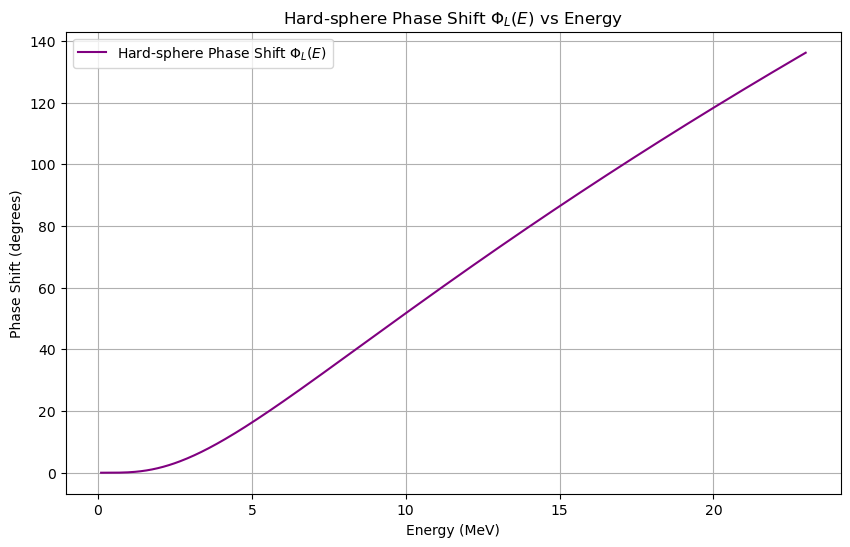

In [241]:
# After your energy loop and computing phi_L array
phi_L_deg = np.degrees(phi_L)  # Convert from radians to degrees

plt.figure(figsize=(10,6))
plt.plot(energies, phi_L_deg, color='purple', label=r'Hard-sphere Phase Shift $\Phi_L(E)$')
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Hard-sphere Phase Shift $\Phi_L(E)$ vs Energy')
plt.grid(True)
plt.legend()
plt.show()

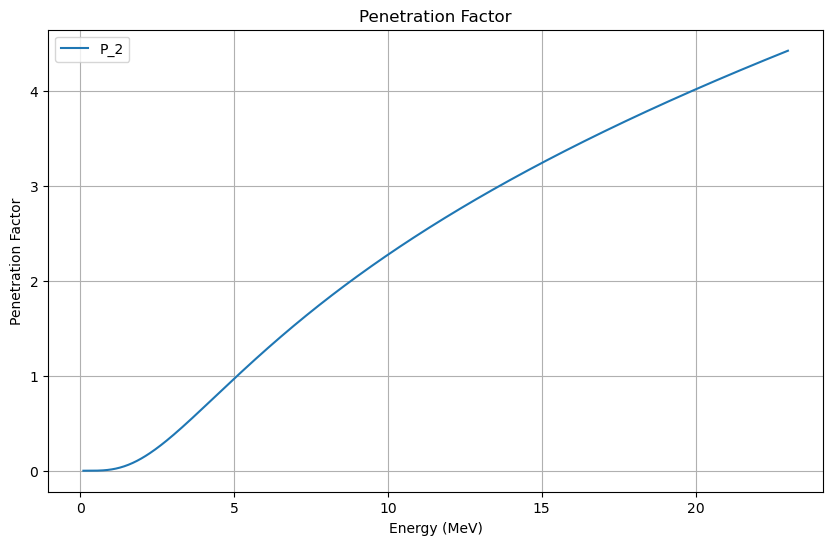

In [246]:
denominator_array = E_r + np.array(Delta_E) - energies

plt.figure(figsize=(10,6))
plt.plot(energies, P_L_array, label='P_2')
plt.xlabel('Energy (MeV)')
plt.ylabel('Penetration Factor')
plt.title('Penetration Factor')
plt.grid(True)
plt.legend()
plt.show()